In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sentimentdataset.csv')  


# Check sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Print results
print("Sentiment Distribution:")
print(sentiment_counts)

# Plotting
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution of Posts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Platform Usage:
Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64


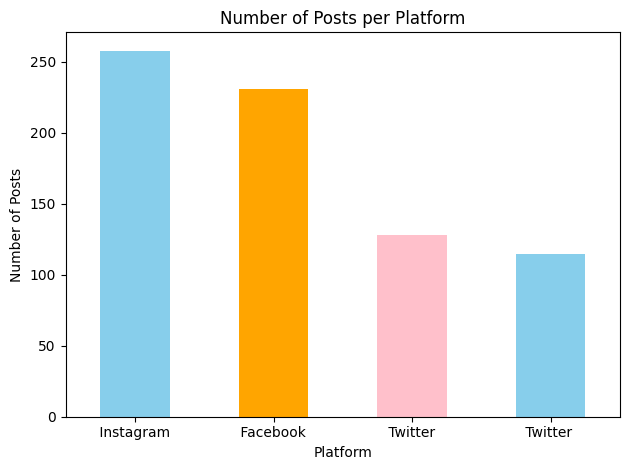

In [ ]:
# Count the number of posts per platform
platform_counts = df['Platform'].value_counts()

# Print results
print("Platform Usage:")
print(platform_counts)

# Plotting
platform_counts.plot(kind='bar', color=['skyblue', 'orange', 'pink'])
plt.title("Number of Posts per Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Top 10 Hashtags:
          Hashtag  Count
173     #Serenity     15
10     #Gratitude     13
131   #Excitement     13
220      #Despair     11
267    #Nostalgia     11
172  #Contentment     10
258    #Curiosity     10
224   #Loneliness      9
314      #Hopeful      9
114          #Awe      9


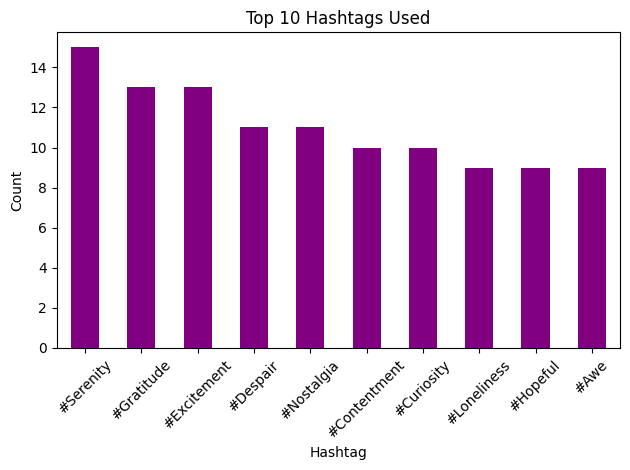

In [ ]:
from collections import Counter
import itertools

# Drop missing values in Hashtags column and split each cell into list of hashtags
all_hashtags = df['Hashtags'].dropna().apply(lambda x: x.split())

# Flatten the list of lists into a single list
flat_hashtags = list(itertools.chain.from_iterable(all_hashtags))

# Count occurrences
hashtag_counts = Counter(flat_hashtags)

# Convert to DataFrame for easy visualization
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count']).sort_values(by='Count', ascending=False)

# Display top 10 hashtags
print("Top 10 Hashtags:")
print(hashtag_df.head(10))

# Plotting
hashtag_df.head(10).plot(x='Hashtag', y='Count', kind='bar', color='purple', legend=False)
plt.title("Top 10 Hashtags Used")
plt.xlabel("Hashtag")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


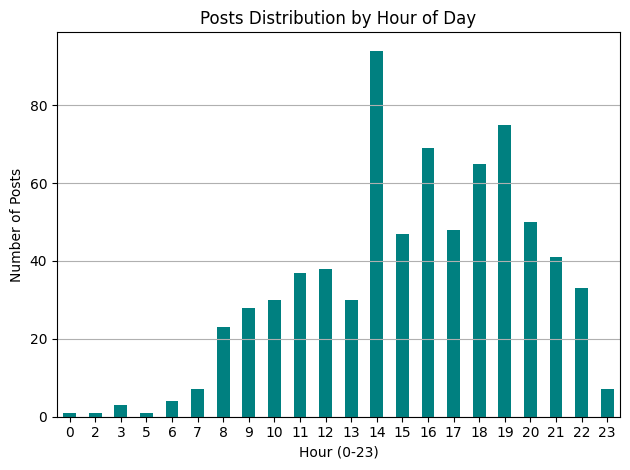

In [ ]:
# Count number of posts per hour
hourly_posts = df['Hour'].value_counts().sort_index()

# Plotting
hourly_posts.plot(kind='bar', color='teal')
plt.title("Posts Distribution by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\anshu\AppData\Local\Temp\ipykernel_20732\876109928.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

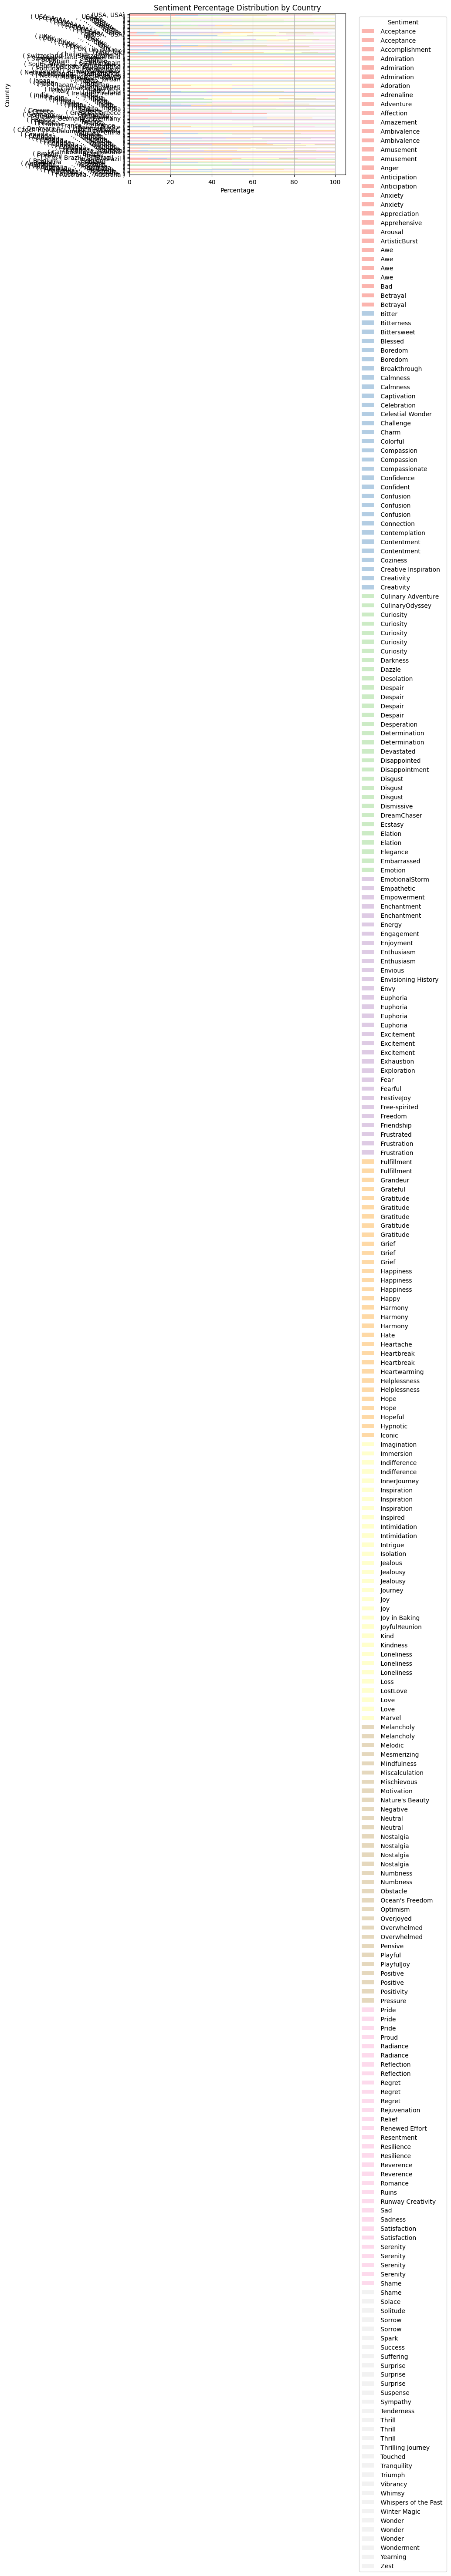

In [ ]:
import seaborn as sns

# Calculate % distribution of sentiments per country
sentiment_pct = (
    df.groupby(['Country', 'Sentiment'])
    .size()
    .groupby(level=0)
    .apply(lambda x: (x / x.sum()) * 100)
    .unstack()
    .fillna(0)
    .sort_index()
)

# Plot horizontally with seaborn for better control
plt.figure(figsize=(12, 10))
sentiment_pct.plot(kind='barh', stacked=True, colormap='Pastel1')

plt.title("Sentiment Percentage Distribution by Country")
plt.xlabel("Percentage")
plt.ylabel("Country")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

